In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [2]:
prob = "PandaPusherDense"
window_size = 10
nb_episodes = 300


In [3]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [4]:
base_path = f"C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Files\\Results\\{prob}"



### Plot subfigures



In [5]:
PPD_dict_auc_mean = {}
PPD_dict_auc_std = {}


('len(mean_rewards) ', 300, '\n')
QRNN-ASNN-PF: AUC = -6172.80 ± 866.42
('len(mean_rewards) ', 300, '\n')
QRNN-basic-PF: AUC = -5461.67 ± 1063.30
('len(mean_rewards) ', 2, '\n')
QRNN-rnd-PF: AUC = -0.20 ± 0.04


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Files\\Results\\PandaPusherDense\\PandaPusherDense_RS_mid_QRNN_July21.npz'

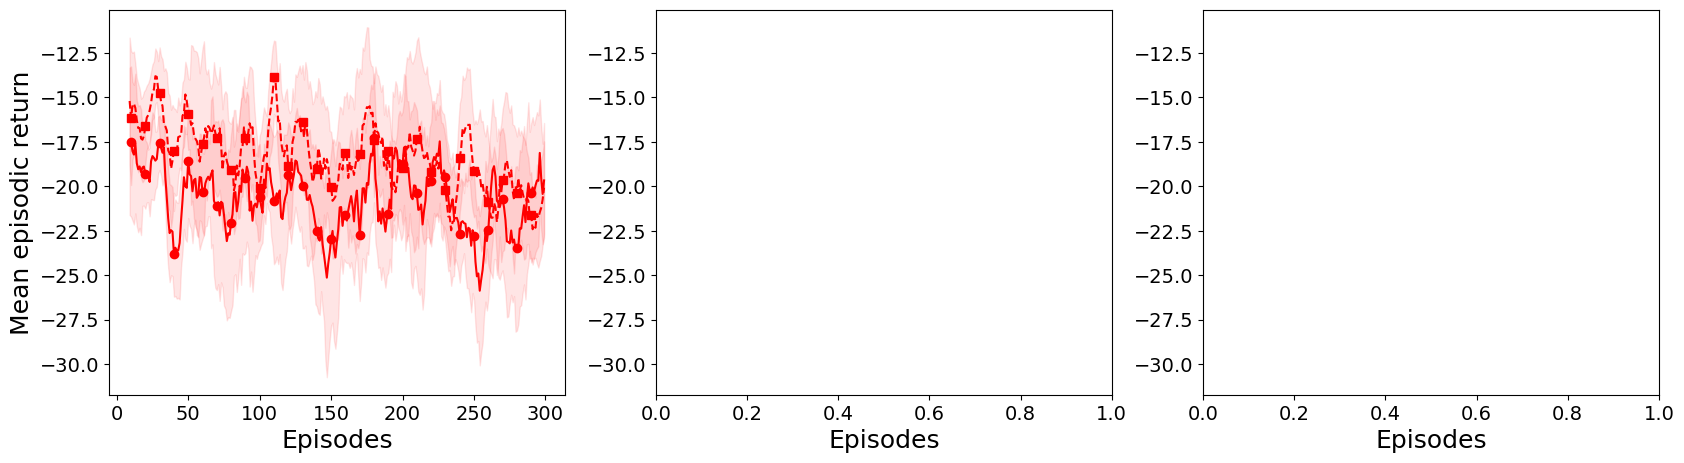

In [9]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_July21.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_July21.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_July21.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_July21.npz',
    
    }
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    print(("len(mean_rewards) ", len(mean_rewards), "\n"))
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_July21.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_July21.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_July21.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_July21.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_June25_results.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_June25_CEM.npz',
                        # 'C:\Users\nicle\Desktop\QRNN-MPC\PandaReacher_MPC_QRNN_ASNN_mid_May12_CEM.npz'
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May21_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May21_CEM.npz',
    # 'QRNN-EvoCEM': f"{base_path}\\{prob}_MPC_QRNN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",
    }
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_June25_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May21_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May21_CEM.npz',
    # '50NN-EvoCEM': f"{base_path}\\{prob}_MPC_50NN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",
}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_June25_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May21_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May21_CEM.npz',
    # 'MSENN-EvoCEM': f"{base_path}\\{prob}_MPC_MSENN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",
    }
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     # print("mean_rewards ", data['ep[]'], "\n")
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
RL_methods = {
    'A2C': f'{base_path}\\{prob}_A2C_results_June27.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results_June27.npz',
    'DDPG': f'{base_path}\\{prob}_DDPG_results_June27.npz',
    'SAC': f'{base_path}\\{prob}_SAC_results_June27.npz',
    'TD3': f'{base_path}\\{prob}_TD3_results_June27.npz',
    'TQC': f'{base_path}\\{prob}_TQC_results_June27.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DDPG_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PPD_dict_auc_mean[label] = auc_mean
    PPD_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

##################################################

########################
# prob_Control = "PandaReachDense"
Control_methods = {
    'MPPI': f'{base_path}\\{prob}_MPPI_results.npz',
    'CEM': f'{base_path}\\{prob}_CEM_results.npz',
    'iCEM': f'{base_path}\\{prob}_iCEM_results.npz',
    'GP-MPC': f'{base_path}\\{prob}_GP-MPC_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    'PETS-CEM': f'{base_path}\\{prob}_PETS_CEM_results.npz',
    
    # 'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_Control}_MPPI_results.npz',
    # 'GP-MPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_Control}_GP-MPC_results.npz',
    # # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    # 'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\PETS\\{prob}_PETS_CEM_results.npz',
    # # C:\Users\nicle\Desktop\QRNN-MPC\PETS\PandaReacherDense_PETS_results.npz

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_CEM = 'deeppink'
color_iCEM = 'darkviolet'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

#########################
MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards'][:nb_episodes]
std_returns_MPPI = MPPI_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PPD_dict_auc_mean['MPPI'] = auc_mean
PPD_dict_auc_std['MPPI'] = auc_std

#########################
CEM_data = np.load(Control_methods['CEM'])
mean_returns_CEM = CEM_data['mean_rewards'][:nb_episodes]
std_returns_CEM = CEM_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_CEM = pd.Series(mean_returns_CEM).rolling(window=window_size).mean()
smoothed_std_CEM = pd.Series(std_returns_CEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(CEM_data, nb_episodes)
print(f"CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PPD_dict_auc_mean['CEM'] = auc_mean
PPD_dict_auc_std['CEM'] = auc_std

#########################
iCEM_data = np.load(Control_methods['iCEM'])
mean_returns_iCEM = iCEM_data['mean_rewards'][:nb_episodes]
std_returns_iCEM = iCEM_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_iCEM = pd.Series(mean_returns_iCEM).rolling(window=window_size).mean()
smoothed_std_iCEM = pd.Series(std_returns_iCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(iCEM_data, nb_episodes)
print(f"iCEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PPD_dict_auc_mean['iCEM'] = auc_mean
PPD_dict_auc_std['iCEM'] = auc_std

#########################
GPMPC_data = np.load(Control_methods['GP-MPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards'][:nb_episodes]
std_returns_GPMPC = GPMPC_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PPD_dict_auc_mean['GP-MPC'] = auc_mean
PPD_dict_auc_std['GP-MPC'] = auc_std

# iLQR_data = np.load(Control_methods['iLQR'])
# mean_returns_iLQR = iLQR_data['mean_rewards'][:300]
# std_returns_iLQR = iLQR_data['std_rewards'][:300]
# # Smooth the data
# smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
# smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

PETSCEM_data = np.load(Control_methods['PETS-CEM'])
mean_returns_PETSCEM = PETSCEM_data['mean_rewards'][:nb_episodes]
std_returns_PETSCEM = PETSCEM_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(PETSCEM_data, nb_episodes)
print(f"PETS-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PPD_dict_auc_mean['PETS-CEM'] = auc_mean
PPD_dict_auc_std['PETS-CEM'] = auc_std


###############################
plt.plot(smoothed_mean_MPPI, label='MPPI', color=color_MPPI)
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color=color_MPPI, alpha=0.1)

#########################
plt.plot(smoothed_mean_CEM, label='CEM', color=color_CEM)
plt.fill_between(range(len(smoothed_mean_CEM)), 
                 smoothed_mean_CEM - smoothed_std_CEM, 
                 smoothed_mean_CEM + smoothed_std_CEM, 
                 color=color_CEM, alpha=0.1)

#########################
plt.plot(smoothed_mean_iCEM, label='iCEM', color=color_iCEM)
plt.fill_between(range(len(smoothed_mean_iCEM)), 
                 smoothed_mean_iCEM - smoothed_std_iCEM, 
                 smoothed_mean_iCEM + smoothed_std_iCEM, 
                 color=color_iCEM, alpha=0.1)

###############################
plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
plt.fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)

###############################
# plt.plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
# plt.fill_between(range(len(smoothed_mean_iLQR)), 
#                  smoothed_mean_iLQR - smoothed_std_iLQR, 
#                  smoothed_mean_iLQR + smoothed_std_iLQR, 
#                  color=color_iLQR, alpha=0.1)


###############################
plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
                 smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
                 smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
                 color=color_PETSCEM, alpha=0.1)



##################################################
markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# 50NN_ASNN_CEM
color_50NN_ASNN_CEM = 'aqua'
marker_50NN_ASNN_CEM = markers[0]
linestyle_50NN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_June25_results.npz')
mean_rewards_50NN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_ASNN_CEM = pd.Series(mean_rewards_50NN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_ASNN_CEM = pd.Series(std_rewards_50NN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_ASNN_CEM, 
            label="50NN-ASNN-CEM", 
            color=color_50NN_ASNN_CEM,
            marker=marker_50NN_ASNN_CEM,
            linestyle=linestyle_50NN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_ASNN_CEM)), 
                    smoothed_mean_50NN_ASNN_CEM - smoothed_std_50NN_ASNN_CEM, 
                    smoothed_mean_50NN_ASNN_CEM + smoothed_std_50NN_ASNN_CEM, 
                    color=color_50NN_ASNN_CEM, alpha=0.1)


# QRNN_basic_PF
color_QRNN_basic = 'red'
marker_QRNN_basic = markers[1]
linestyle_QRNN_basic = linestyles[1]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',)
mean_rewards_QRNN_basic = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_basic = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-basic-PF: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_basic = pd.Series(mean_rewards_QRNN_basic).rolling(window=window_size).mean()
smoothed_std_QRNN_basic = pd.Series(std_rewards_QRNN_basic).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_basic, 
            label="QRNN-basic-PF", 
            color=color_QRNN_basic,
            marker=marker_QRNN_basic,
            linestyle=linestyle_QRNN_basic,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_basic)), 
                    smoothed_mean_QRNN_basic - smoothed_std_QRNN_basic, 
                    smoothed_mean_QRNN_basic + smoothed_std_QRNN_basic, 
                    color=color_QRNN_basic, alpha=0.1)

# MSENN_ASNN_CEM
color_MSENN_ASNN_CEM = 'limegreen'
marker_MSENN_ASNN_CEM = markers[0]
linestyle_MSENN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_June25_results.npz',)
mean_rewards_MSENN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_ASNN_CEM = pd.Series(mean_rewards_MSENN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_ASNN_CEM = pd.Series(std_rewards_MSENN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_ASNN_CEM, 
            label="MSENN-ASNN-CEM", 
            color=color_MSENN_ASNN_CEM,
            marker=marker_MSENN_ASNN_CEM,
            linestyle=linestyle_MSENN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_ASNN_CEM)), 
                    smoothed_mean_MSENN_ASNN_CEM - smoothed_std_MSENN_ASNN_CEM, 
                    smoothed_mean_MSENN_ASNN_CEM + smoothed_std_MSENN_ASNN_CEM, 
                    color=color_MSENN_ASNN_CEM, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [ ]:
PPD_dict_auc_mean, PPD_dict_auc_std



({'QRNN-ASNN-PF': -149.70783082659668,
  'QRNN-basic-PF': -141.42317792936228,
  'QRNN-rnd-PF': -144.87982625390092,
  'QRNN-RS': -254.05583756432557,
  '50NN-ASNN-PF': -141.2340352795242,
  '50NN-basic-PF': -9736.578531788042,
  '50NN-rnd-PF': -158.72951469271598,
  '50NN-RS': -240.36256162946424,
  'MSENN-ASNN-PF': -131.01668420170122,
  'MSENN-basic-PF': -281.6380229840676,
  'MSENN-rnd-PF': -248.8749569132924,
  'MSENN-RS': -267.6509189043815,
  'QRNN-ASNN-CEM': -269.83064228575677,
  'QRNN-basic-CEM': -286.7303383819138,
  'QRNN-rnd-CEM': -188.38894051002958,
  '50NN-ASNN-CEM': -215.53618829650804,
  '50NN-basic-CEM': -8985.516379430579,
  '50NN-rnd-CEM': -187.9130108638977,
  'MSENN-ASNN-CEM': -279.53265867816907,
  'MSENN-basic-CEM': -391.9659246482576,
  'MSENN-rnd-CEM': -207.01530454090485,
  'A2C': -3338.6642165,
  'PPO': -3191.1167458333334,
  'DDPG': -2870.6620868333334,
  'SAC': -2927.819774,
  'TD3': -2783.644112833333,
  'TQC': -2710.7394338333334,
  'MPPI': -1098.611385

In [ ]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\PPD_auc_mean.json', 'w') as f:
    json.dump(PPD_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\PPD_auc_std.json', 'w') as f:
    json.dump(PPD_dict_auc_std, f)



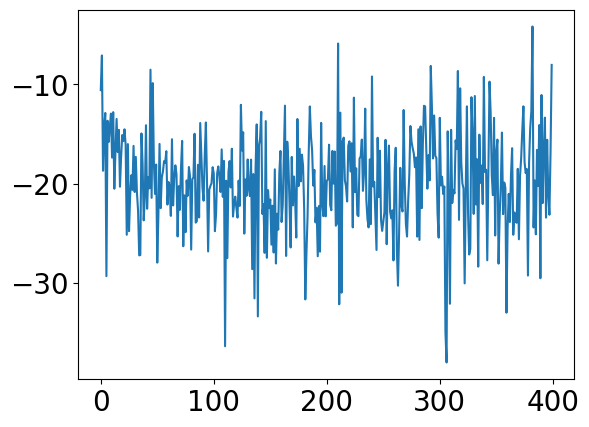

In [ ]:
plt.plot(np.load("C:\\Users\\nicle\\Desktop\\QRNN-MPC\\PandaPusher_MPC_QRNN_ASNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz")['mean_rewards'])

